# Devanagari Character Recognition using Convolutional Neural Networks

Train a CNN to classify images from Devanagari Character Set (over 92 thousand images of characters from devanagari script)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the data
# The dataset consists of 92000 rows (sample images), and 1025 columns. 
# Each row contains the pixel data ("pixel0000" to "pixel1023"), in greyscale values (0 to 255). 
# The column "character" represents the Devanagari character name corresponding to each image.
dataset = pd.read_csv("devanagari-character-set/data.csv")
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [12]:
from sklearn.model_selection import train_test_split

imageWidth = 32
imageHeight = 32
imageDepth = 1;

X = dataset.iloc[:,:-1]
X = X.values.reshape(X.shape[0], imageWidth, imageHeight, imageDepth)
y = dataset['character'].values

# Rescale the Images by Dividing Every Pixel in Every Image by 255
# rescale [0,255] --> [0,1]
X = X.astype('float32')/255

# Get the output in binary format
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
y = binencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

print("The dataset has a training set of %d examples." % len(X_train))
print("The dataset has a test set of %d examples." % len(X_test))

The dataset has a training set of 73600 examples.
The dataset has a test set of 18400 examples.


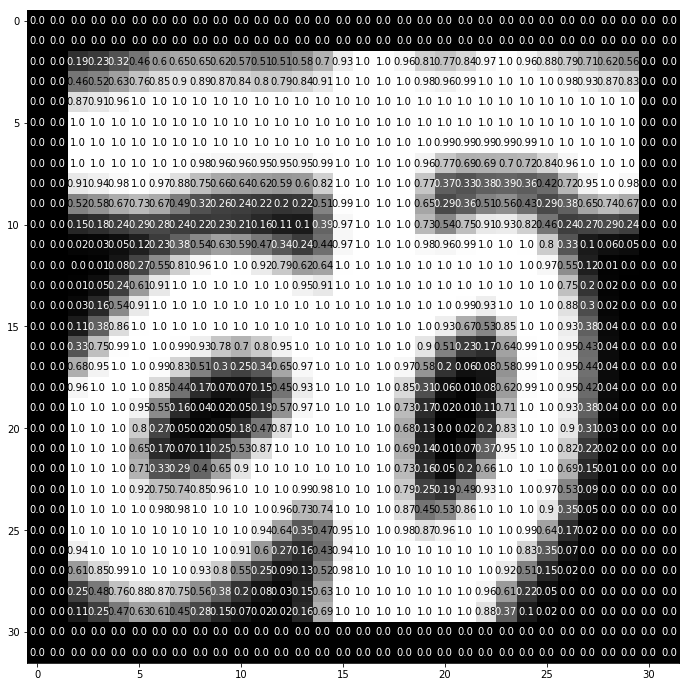

In [13]:
# Visualize a Image
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xImages = X.reshape(X.shape[0], imageWidth, imageHeight)

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(xImages[0], ax)


In [14]:
# print first ten training labels
print(y[:10])

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]]


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the Model Architecture
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(imageWidth, imageHeight, imageDepth)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(46, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         32896     
__________

In [16]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

# Save the model craeting a HDF5 file
from keras.models import load_model
model.save('DevanagariModel.hdf5') 

In [17]:
# Calculate the Classification Accuracy on the Test Set (Before Training)
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 2.0924%


In [18]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='DevanagariModelBestWeights.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=20,
          validation_split=0.20, callbacks=[checkpointer],
          verbose=0, shuffle=True)

Epoch 00000: val_loss improved from inf to 0.58678, saving model to DevanagariModelBestWeights.hdf5
Epoch 00001: val_loss improved from 0.58678 to 0.26585, saving model to DevanagariModelBestWeights.hdf5
Epoch 00002: val_loss improved from 0.26585 to 0.16097, saving model to DevanagariModelBestWeights.hdf5
Epoch 00003: val_loss improved from 0.16097 to 0.10822, saving model to DevanagariModelBestWeights.hdf5
Epoch 00004: val_loss improved from 0.10822 to 0.10080, saving model to DevanagariModelBestWeights.hdf5
Epoch 00005: val_loss improved from 0.10080 to 0.08237, saving model to DevanagariModelBestWeights.hdf5
Epoch 00006: val_loss improved from 0.08237 to 0.06819, saving model to DevanagariModelBestWeights.hdf5
Epoch 00007: val_loss improved from 0.06819 to 0.06708, saving model to DevanagariModelBestWeights.hdf5
Epoch 00008: val_loss improved from 0.06708 to 0.06658, saving model to DevanagariModelBestWeights.hdf5
Epoch 00009: val_loss improved from 0.06658 to 0.05592, saving model

In [19]:
# Load the Model with the Best Classification Accuracy on the Validation Set
model.load_weights('DevanagariModelBestWeights.hdf5')

In [20]:
# Calculate the Classification Accuracy on the Test Set
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.5163%
